In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
sns.set(style="darkgrid")


In [2]:
samsung_df = pd.read_csv(r"../samsung.csv")

print(samsung_df.info())
print(samsung_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2850 non-null   object
 1   Close   2850 non-null   int64 
 2   Volume  2850 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 66.9+ KB
None
         Date  Close    Volume
0  02/01/2008  10880  18047200
1  03/01/2008  10920  19346500
2  04/01/2008  10780  17997350
3  07/01/2008  10380  39787200
4  08/01/2008  10320  24783700


In [3]:
#'Date' a datetime
samsung_df['Date'] = pd.to_datetime(samsung_df['Date'], format='%d/%m/%Y')


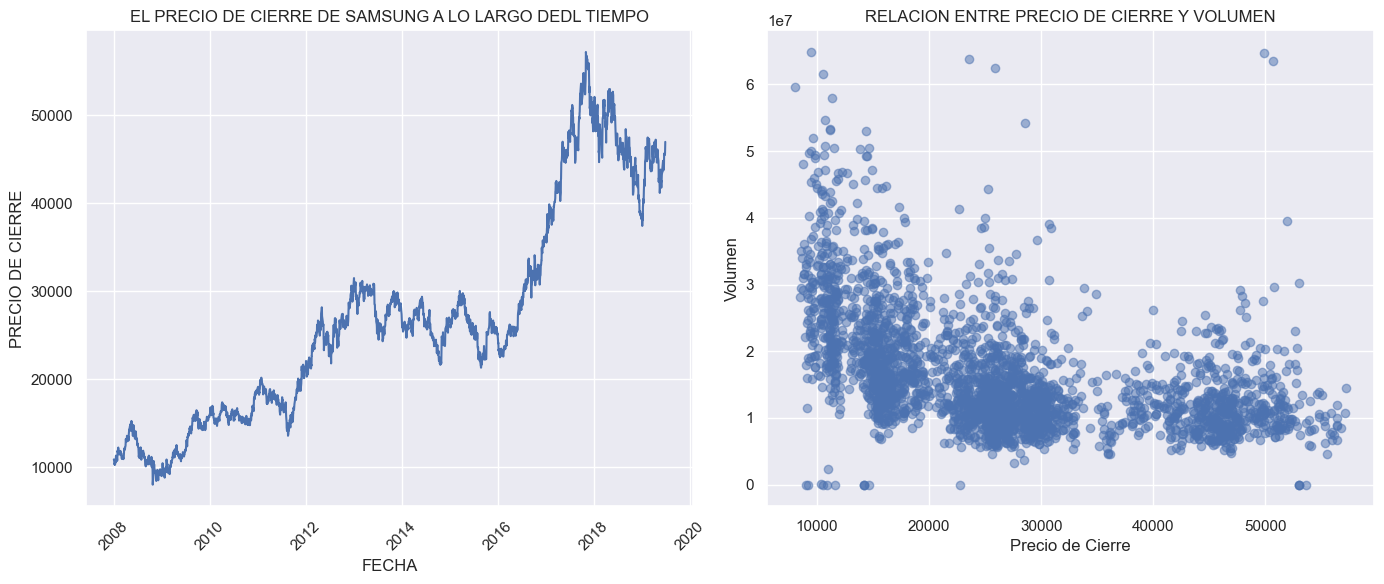

In [4]:
plt.figure(figsize=(14, 6))

# PRECIO DE CIERRE A LO LARGO DEL TIEMPO
plt.subplot(1, 2, 1)
plt.plot(samsung_df['Date'], samsung_df['Close'], 'b-')
plt.title('EL PRECIO DE CIERRE DE SAMSUNG A LO LARGO DEDL TIEMPO')
plt.xlabel('DATE')
plt.ylabel('CLOSE PRICE')
plt.xticks(rotation=45)

# RELACION PRECIO DE CIERRE VS VOLUMEN
plt.subplot(1, 2, 2)
plt.scatter(samsung_df['Close'], samsung_df['Volume'], alpha=0.5)
plt.title('RELACION ENTRE PRECIO DE CIERRE Y VOLUMEN')
plt.xlabel('CLOSE PRICE')
plt.ylabel('VOLUME')

plt.tight_layout()
plt.show()


In [5]:
# Seleccionar características para clustering
X_cluster = samsung_df[['Close', 'Volume']].copy()

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


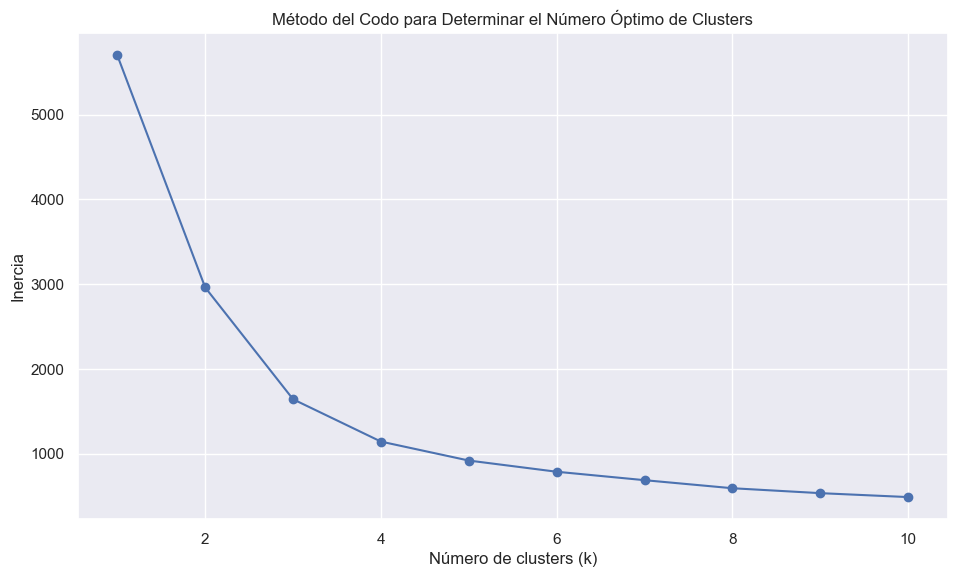

In [6]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualizar método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('NUMERO DE CLUSTERES "K"')
plt.ylabel('INERCIA')
plt.title('METODO DEL CODO PARA DETERMINAR EL NUMERO DE CLUSTERES')
plt.grid(True)
plt.show()


In [7]:
# ASUMIMOS QUE EL K OPTIMO ES IGUAL A 4
optimal_k = 4
print(f"NUMERO OPTIMO DE CLUSTERES: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
samsung_df['Cluster'] = kmeans.fit_predict(X_scaled)


Número óptimo de clusters determinado: 4


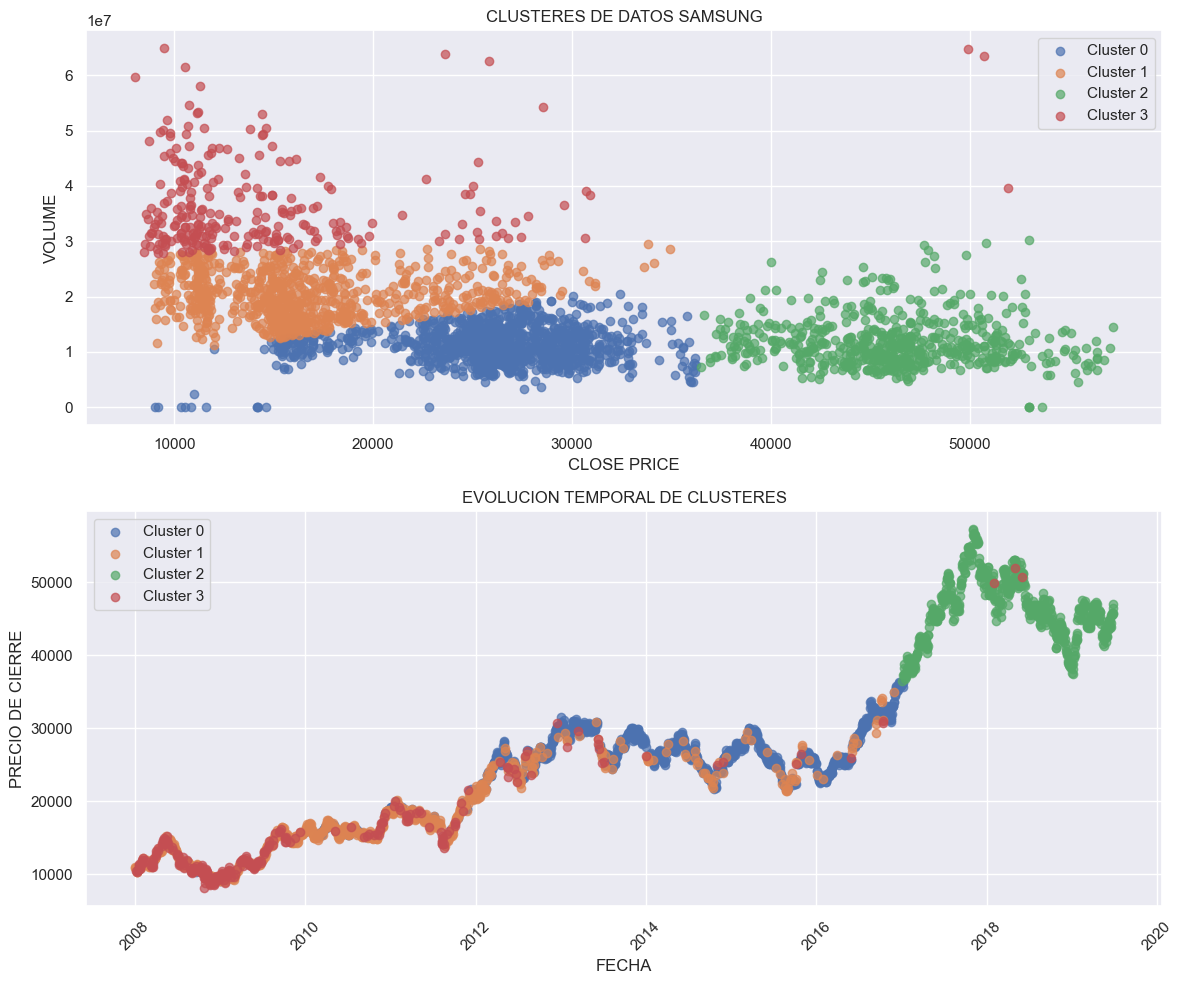

In [10]:
plt.figure(figsize=(12, 10))

# Gráfico de dispersión
plt.subplot(2, 1, 1)
for i in range(optimal_k):
    cluster_data = samsung_df[samsung_df['Cluster'] == i]
    plt.scatter(cluster_data['Close'], cluster_data['Volume'], 
                label=f'Cluster {i}', alpha=0.7)

plt.xlabel('CLOSE PRICE')
plt.ylabel('VOLUME')
plt.title('CLUSTERES DE DATOS SAMSUNG')
plt.legend()
plt.grid(True)

# Evolución temporal de clusters
plt.subplot(2, 1, 2)
for i in range(optimal_k):
    cluster_data = samsung_df[samsung_df['Cluster'] == i]
    plt.scatter(cluster_data['Date'], cluster_data['Close'], 
                label=f'Cluster {i}', alpha=0.7)

plt.xlabel('FECHA')
plt.ylabel('PRECIO DE CIERRE')
plt.title('EVOLUCION TEMPORAL DE CLUSTERES')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [11]:
cluster_analysis = samsung_df.groupby('Cluster').agg({
    'Close': ['mean', 'min', 'max', 'std'],
    'Volume': ['mean', 'min', 'max', 'std']
})

print("ANALISIS FINAL DE LOS CLUSTERES")
print(cluster_analysis)


ANALISIS FINAL DE LOS CLUSTERES
                Close                                   Volume            \
                 mean    min    max          std          mean       min   
Cluster                                                                    
0        25976.026711   9020  36240  4384.814485  1.115716e+07         0   
1        16812.566038   8970  34920  4931.226666  2.026268e+07  11348350   
2        46193.455760  36480  57220  4333.336736  1.171521e+07         0   
3        14290.968992   8040  51900  6379.933906  3.646075e+07  27906950   

                                 
              max           std  
Cluster                          
0        20532200  3.071631e+06  
1        29558150  4.072094e+06  
2        30310800  4.417454e+06  
3        64873450  7.915941e+06  
